### Project (Mod 1 Project - Flatiron Data Science Bootcamp, March , 2020 Washington, D.C.)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
d = pd.read_csv('imdb_ahsan.csv')

In [3]:
d.head()

,Unnamed: 0,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit,genre,genre_1,genre_2
0,0,6.099,3.3,102,1500000,0,-1500000,crime,drama,horror
1,1,17.892,6.9,4629,5000000,108286422,103286422,drama,horror,mystery
2,3,13.183,5.6,1312,35000000,71118378,36118378,action,drama,history
3,4,16.493,7.9,6631,20000000,181025343,161025343,biography,drama,history
4,5,11.435,7.0,4469,18000000,60217171,42217171,adventure,biography,drama


In [4]:
df_f = d.drop(columns = ['Unnamed: 0'])

In [5]:
df_f.head()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit,genre,genre_1,genre_2
0,6.099,3.3,102,1500000,0,-1500000,crime,drama,horror
1,17.892,6.9,4629,5000000,108286422,103286422,drama,horror,mystery
2,13.183,5.6,1312,35000000,71118378,36118378,action,drama,history
3,16.493,7.9,6631,20000000,181025343,161025343,biography,drama,history
4,11.435,7.0,4469,18000000,60217171,42217171,adventure,biography,drama


In [6]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
popularity           1079 non-null float64
vote_average         1079 non-null float64
vote_count           1079 non-null int64
production_budget    1079 non-null int64
worldwide_gross      1079 non-null int64
profit               1079 non-null int64
genre                1079 non-null object
genre_1              1079 non-null object
genre_2              1079 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 76.0+ KB


In [7]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,1079.0,1.282784e+01,8.755833e+00,0.6,7.731000e+00,1.113400e+01,1.622800e+01,8.077300e+01
vote_average,1079.0,6.211307e+00,9.612926e-01,1.0,5.750000e+00,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,1079.0,2.173632e+03,3.030426e+03,1.0,2.640000e+02,9.820000e+02,2.863000e+03,2.218600e+04
production_budget,1079.0,5.016242e+07,5.875217e+07,25000.0,1.000000e+07,2.800000e+07,6.775000e+07,4.106000e+08
worldwide_gross,1079.0,1.579006e+08,2.537002e+08,0.0,7.782649e+06,5.858641e+07,1.765525e+08,2.048134e+09
profit,1079.0,1.077382e+08,2.108060e+08,-110450242.0,-1.529154e+06,2.478717e+07,1.182069e+08,1.748134e+09


In [8]:
df_f.shape

(1079, 9)

In [9]:
list(df_f.columns)

['popularity',
 'vote_average',
 'vote_count',
 'production_budget',
 'worldwide_gross',
 'profit',
 'genre',
 'genre_1',
 'genre_2']

In [10]:
# Check for missing values by column
df_f.isna().sum()

popularity           0
vote_average         0
vote_count           0
production_budget    0
worldwide_gross      0
profit               0
genre                0
genre_1              0
genre_2              0
dtype: int64

In [11]:
data = df_f.dropna()

In [12]:
data.isna().sum()

popularity           0
vote_average         0
vote_count           0
production_budget    0
worldwide_gross      0
profit               0
genre                0
genre_1              0
genre_2              0
dtype: int64

In [13]:
data.shape

(1079, 9)

In [14]:
df = data

In [15]:
df.head()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit,genre,genre_1,genre_2
0,6.099,3.3,102,1500000,0,-1500000,crime,drama,horror
1,17.892,6.9,4629,5000000,108286422,103286422,drama,horror,mystery
2,13.183,5.6,1312,35000000,71118378,36118378,action,drama,history
3,16.493,7.9,6631,20000000,181025343,161025343,biography,drama,history
4,11.435,7.0,4469,18000000,60217171,42217171,adventure,biography,drama


## Step 1 Train/test Split

### Target is profit

In [18]:
X = data.drop(columns =['profit'])
y = data['profit']

In [19]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .20)

In [20]:
# get the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((863, 8), (216, 8), (863,), (216,))

### Step 2- Exploratory Data Analysis

checking missing valuses etc. our data is already clean 

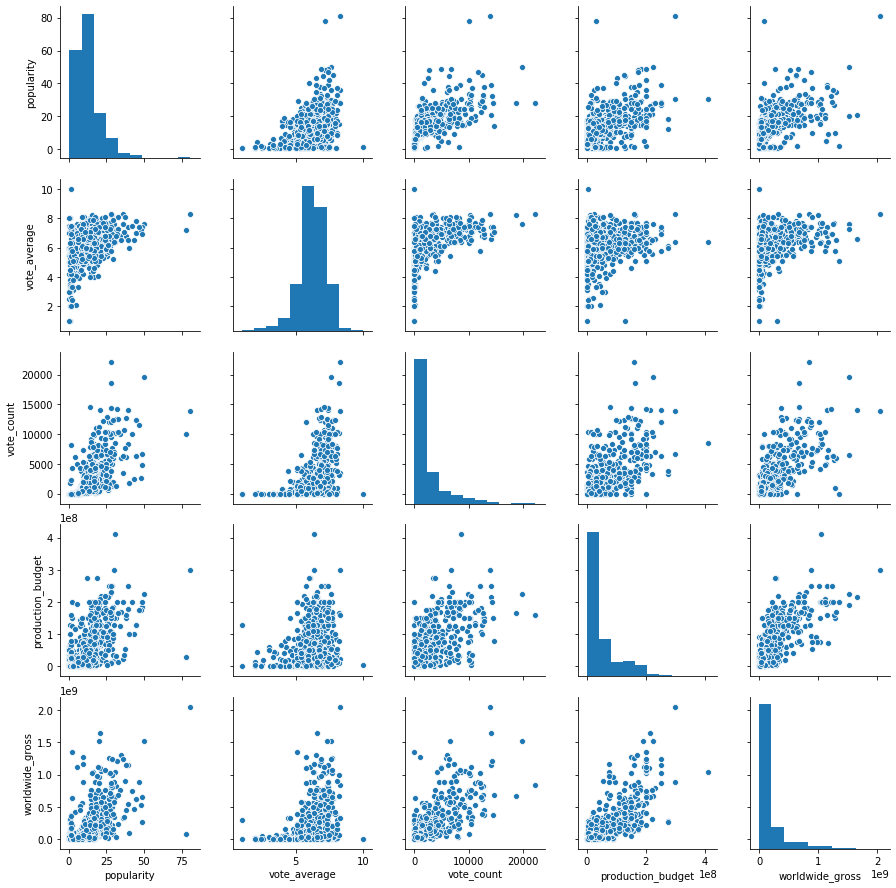

In [21]:
#create scatterplot matrix
sns.pairplot(X_train)

### Next let's look at the distribution of our variables

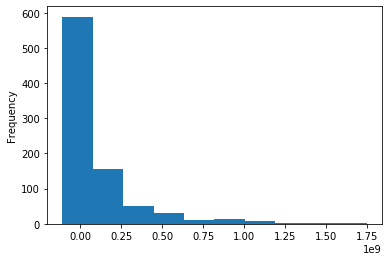

In [22]:
#histogram of y_train
y_train.plot(kind='hist')

In [23]:
categorical_variables = ['genre','genre_1','genre_2']

In [24]:
remaining_list = ['popularity',
 'vote_average',
 'vote_count',
 'production_budget',
 'worldwide_gross',
 'profit']

In [25]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:

## create an encoder object. This will help us to convert
## categorical variables to new columns
encoder = OneHotEncoder(handle_unknown= 'error',
                        drop='first',
                        categories= 'auto')

## Create an columntransformer object.
## This will help us to merge transformed columns
## with the rest of the dataset.

ct = ColumnTransformer(transformers =[('ohe', encoder, ['genre','genre_1','genre_2'])],
                                    remainder= ss)
ct.fit_transform(X_train)
X = ct.transform(X_train)

In [28]:
X.shape

(863, 52)

In [29]:
ct.transform(X_test)

<216x52 sparse matrix of type '<class 'numpy.float64'>'
	with 1597 stored elements in Compressed Sparse Row format>

In [30]:
ct.transform(X_test).shape

(216, 52)

In [31]:
Xtest  = ct.transform(X_test)
Xtest.shape

(216, 52)

### Outlier Removal

## Step 4 - Messy Model

### First let's use statsmodels

## Now let's use sklearn

In [32]:
#initialize a linear regression model in sklearn
linreg = LinearRegression()

In [33]:
#fit linear model to training data
linreg.fit(X, y_train)
linreg.score(X, y_train)

0.999999999999995

In [34]:
linreg.coef_

array([ 3.63760986e+00,  4.44492087e+00, -6.58477788e+00, -2.98293018e+00,
       -1.07653999e+01, -5.51517866e+00, -3.17079141e+01, -7.35443233e+01,
       -8.03671418e+01, -1.91319839e+01,  5.92648166e+01, -9.82603042e+01,
       -6.85720414e+00, -5.69428002e+00,  4.70253788e+00,  6.15934103e+00,
        1.45712247e+01,  1.40582867e+01,  1.78339219e+01,  2.38639581e+01,
        6.47713242e+01,  3.06700882e+01,  9.90883317e+01,  2.57210915e+01,
        3.31711614e+01,  1.34068496e+01, -1.88335463e+02,  9.61266939e+01,
       -5.94610874e+01,  2.00878226e+00, -4.79206315e+00,  7.31693172e+00,
        1.12011407e+00, -5.03613063e+00,  3.74392276e-01, -1.18025757e+01,
       -1.20636046e+01, -3.16300951e+00, -6.75559483e+00, -6.30074475e+00,
        6.56046164e+01, -1.33144969e+01, -5.42866540e+00, -9.94015375e+00,
       -1.48120508e+01, -3.12658226e+01,  4.40384082e+01, -6.86739060e-01,
       -1.23511131e+00,  1.60889704e+00, -5.79668403e+07,  2.64014267e+08])

In [35]:
#get r squared value from sklearn
X.shape

(863, 52)

## Step 5 - Model Evaluation

In [36]:
#get r squared value from sklearn
X.shape

(863, 52)

### Now let's look at predictions of relative performance to compare to actual relative performance

In [37]:
linreg_results_df = pd.DataFrame(linreg.predict(X), y_train).reset_index()

In [38]:
linreg_results_df.columns = ['Actual_profit', 'Predicted_Profit']

In [39]:
linreg_results_df.head()

,Actual_profit,Predicted_Profit
0,-13235753,-1.323576e+07
1,57507355,5.750735e+07
2,57917283,5.791728e+07
3,230660018,2.306600e+08
4,297136477,2.971365e+08


## Let's use regularization to see if that helps our model fit

In [40]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

## Lasso Regularizer

In [41]:
#conduct lasso regression on training data
lasso = Lasso()

In [42]:
#Evaluation of lasso on training data
lasso.fit(X, y_train)
lasso.score(X, y_train)

0.9999998090065707

In [43]:
#examine coefficients from lasso
lasso.coef_

array([-1.93398470e+03,  1.62505604e+04,  2.74454800e+04,  2.64023518e+04,
        6.80940513e+03,  4.51618563e+04,  2.72955483e+04,  6.78088174e+04,
        3.92601559e+04,  9.68426342e+03,  4.41045848e+04,  3.11340160e+04,
        1.35323962e+05,  1.24101814e+05,  1.06266986e+05,  9.08675562e+04,
        9.76324027e+04,  9.69610348e+04,  8.00646702e+04,  9.59014930e+04,
        9.09455173e+04,  6.07150443e+04,  1.11004519e+05,  6.91443355e+04,
        6.19180850e+04,  6.05628181e+04,  3.50324978e+04,  9.36094598e+04,
       -7.70261698e+05, -8.67756909e+05, -8.61065876e+05, -8.56981672e+05,
       -8.44779236e+05, -8.53935460e+05, -8.32375397e+05, -8.60291032e+05,
       -8.66247057e+05, -8.64834991e+05, -8.61061049e+05, -8.51778600e+05,
       -8.83394731e+05, -8.58883035e+05, -8.13506935e+05, -8.48319371e+05,
       -8.33416525e+05, -8.46689255e+05, -7.84709122e+05,  6.17366502e+03,
       -2.37470240e+04,  2.58298309e+04, -5.79613569e+07,  2.63994240e+08])

## Ridge Regularizer

In [44]:
#conduct ridge regression on training data
ridge = Ridge()

In [45]:
#Evaluation of ridge on training data
ridge.fit(X, y_train)
ridge.score(X, y_train)

0.9999802947845626

In [46]:
#examine coefficients from ridge
ridge.coef_

array([-4.71690018e+05, -4.18423718e+05,  3.85079685e+05,  3.48665035e+05,
        7.06763035e+05,  8.56925729e+05,  6.52122437e+05,  6.66832208e+05,
       -1.29451685e+06,  7.24977993e+05, -1.96043961e+05, -1.39777551e+06,
        3.42274604e+06,  3.15987718e+06,  1.05398970e+06,  8.84178258e+05,
        1.56844804e+06,  5.93619591e+05, -4.31511331e+05, -2.26589350e+05,
        1.66314836e+06,  1.09253417e+06, -2.90288886e+05,  3.60936069e+05,
        7.55489122e+05,  9.89835785e+05,  4.34845823e+05, -2.92214911e+06,
        7.72653804e+05, -2.46482575e+06, -9.32487430e+05, -2.23885134e+05,
       -1.05536328e+06, -1.15138285e+06, -3.74978275e+05, -1.01974769e+06,
       -1.70830184e+05,  6.95527917e+04,  3.29895655e+05, -1.40070568e+06,
        5.71585968e+05, -5.07149801e+05, -7.84586770e+05, -3.92176421e+05,
       -6.95310230e+05, -1.52790566e+06,  6.50264767e+05,  5.03058026e+04,
       -4.24814480e+04,  5.75369477e+05, -5.68481819e+07,  2.62618880e+08])

## Step 6 - Best Model Evaluation

In [48]:
#Evaluation of ridge on test data
ridge.fit(Xtest, y_test)
ridge.score(Xtest, y_test)

0.9987718179772868

## Step 7 - Model Interpretation

What take-ways do we have? Conclusions about our initial question? Who would care? Why do they care?